from platform import python_version
print(python_version())

pandas.__version__

numpy.__version__

matplotlib.__version__


sklearn.__version__

statsmodels.__version__

scipy.__version__

In [1]:
#MEMASUKKAN PUSTAKA YANG DIBUTUHKAN
import scipy

import numpy
from numpy import sqrt

import matplotlib
from matplotlib import pyplot

import sklearn
from sklearn.metrics import mean_squared_error


import statsmodels
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf 
from statsmodels.tsa.stattools import adfuller


import pandas
from pandas import DataFrame
from pandas import datetime
from pandas import Series
from pandas import read_csv


from itertools import chain


import warnings


from math import sqrt
from math import exp
from math import log

import numpy
from statsmodels.tsa.arima_model import ARIMA

import numpy


In [2]:
# Memasukkan Data Mentah
#def parser(x):
#	return datetime.strptime(x, '%Y-%m')
series = read_csv('produksi-teh-indonesia.csv', header=0, index_col=0, parse_dates=[0], infer_datetime_format=True)#, date_parser=parser)
# Menampilkan Wujud Sebagian Data
print('Produksi Teh Indonesia Tahun Pertama')
print()
print(series.head(12))
print()
print('Produksi Teh Indonesia Tahun Terakhir')
print()
print(series.tail(12))

Produksi Teh Indonesia Tahun Pertama

             Jumlah Ton
Tahun-Bulan            
2006-01-01        12011
2006-02-01        14252
2006-03-01        17008
2006-04-01        15256
2006-05-01        14593
2006-06-01        13620
2006-07-01        10178
2006-08-01         9677
2006-09-01         8132
2006-10-01         7791
2006-11-01        10102
2006-12-01        20170

Produksi Teh Indonesia Tahun Terakhir

             Jumlah Ton
Tahun-Bulan            
2016-01-01        13175
2016-02-01        11606
2016-03-01        11621
2016-04-01        12804
2016-05-01        11706
2016-06-01        11374
2016-07-01        10929
2016-08-01        11391
2016-09-01        10699
2016-10-01        10984
2016-11-01        10974
2016-12-01        11508


In [3]:
mean = 0
var = 0
adf = 0
trans = 0
differ = 0

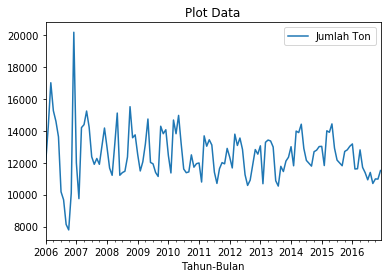

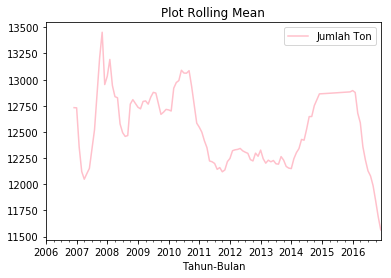

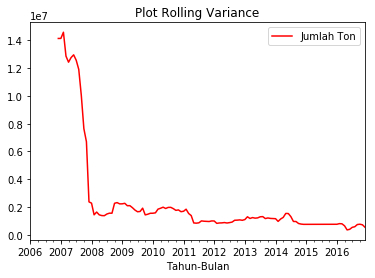

In [4]:
#Membuat Kurva Rolling Mean dan Rolling Variance
rolling = series.rolling(window=12)
rolling_mean = rolling.mean()
rolling_var = rolling.var()
series.plot()
pyplot.title('Plot Data')
rolling_mean.plot(color='pink')
pyplot.title('Plot Rolling Mean')
rolling_var.plot(color='red')
pyplot.title('Plot Rolling Variance')
pyplot.show()
#print(rolling_mean.tail(12))
#rolling_std = rolling.std()
#rolling_std.plot(color='green')

def round_10(n):
    a = (n//10)*10
    b = a + 10
    return (b if n-a > b-n else a)

def rounder(n):
    #l = len(str(round(n)))
    #if (l < 2):
    #   return (round(n))
    #else:
    #    a = (n//10**(l-2))*(10**(l-2))
    #    b = a + (10**(l-2))
    #    #print (l)
    #    return (b if n-a else a)
    a = (n//(10**)*(l-2)))*(10**(l-2))
    b = (a + (10**((l-1)*(l-2))))
    return (round(b) if n-a > b-n else round(a))

In [5]:
# Fungsi Pembulatan Angka Ke Kelipatan 10^(n-1) Terdekat
def rounder(n):
    if (n<1):
        l = len(str(n))
        ln = round(0.5*l)
        a = (n//10**(-(l-2)))*(10**(-(l-2)))
        b = a + 10**(-(l-2))
        return (round(b,ln)) #if ((a > 0) & (b > 0) & (n-a > b-n)) else round(a,ln))        
    else:
        l = len(str(round(int(n))))
        a = (n//10**(l-2))*(10**(l-2))
        b = a + 10**(l-2)
        return (round(b))# if ((a > 0) & (b > 0) & (n-a > b-n)) else round(a))

In [6]:
# Fungsi Pembagian Data Menjadi Dua Bagian
def stat_split(dataset):
    global split, part1, part2
    split = len(dataset) // 2
    part1, part2 = dataset[0:split], dataset[split:]

In [7]:
def mean_split(dataset):
    global mean, mean1, mean2, rmean1, rmean2
    #mean1 = numpy.asarray(mean1)
    #mean2 = numpy.asarray(mean2)
    mean1, mean2 = part1.mean(), part2.mean()
    rmean1, rmean2 = int(rounder(mean1)), int(rounder(mean2))

def mean_print(dataset):
    print('Mean 1 = %f ~ %d, Mean 2 = %f ~ %d' % (mean1, rmean1, mean2, rmean2))

# Fungsi Pengecekan Konsistensi Mean Dua Bagian Data    
def mean_check(dataset):
    global mean
    if (rmean1 == rmean2):
        mean = 0
    else: 
        mean = 1
    if (mean == 0):
        print('Mean Comparison: %d = %d'%(rmean1,rmean2))
        print('Data has Mean Stationary')
    if (mean == 1):
        print('Mean Comparison: %d != %d'%(rmean1,rmean2))
        print('Data does not have Mean Stationarity')
    print()

In [8]:
def var_split(dataset):
    global var1, var2, rvar1, rvar2
    var1, var2 = (part1.var()), (part2.var())
    rvar1, rvar2 = int(rounder(var1)), int(rounder(var2))

def var_print(dataset):
    print ('Variance 1 = %f ~ %d, Variance 2 = %f ~ %d' % (var1, rvar1, var2, rvar2))

# Fungsi Pengecekan Konsistensi Variansi Dua Bagian Data   
def var_check(dataset):
    global var
    if (rvar1 == rvar2):
        var = 0
    else:
        var = 1
    if (var == 0):
        print('Variance Comparison: %d = %d'%(rvar1,rvar2))
        print('Data has Variance Stationarity')
    if (var == 1):
        print('Variance Comparison: %d != %d'%(rvar1,rvar2))
        print('Data does not have Variance Stationarity') 
    print()

In [9]:
# Membuat Pengujian Augmented Dicky Fuller
def adf_check(dataset):
    from statsmodels.tsa.stattools import adfuller
    result = adfuller(dataset)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    print()
    #print (result[4]['5%'])
    if (result[0] < result[4]['5%']):
        print('ADF Statistic < Critical Value 5% --> Data is Stationary')
        adf = 1
    else:
        print('ADF Statistic > Critical Value 5% --> Data is not Stationary')
        adf = 0
##https://machinelearningmastery.com/time-series-data-stationary-python/

In [10]:
series = series.values
stat_split(series)

series = list(map(int, series))
series_ori = series
adf_check(series)

#series = pandas.Series(series)
#series = numpy.array(series)
#series = list(chain(*series))

ADF Statistic: -1.818312
p-value: 0.371409
Critical Values:
	5%: -2.886
	1%: -3.487
	10%: -2.580

ADF Statistic > Critical Value 5% --> Data is not Stationary


In [11]:
mean_split(series)
mean_print(series)
mean_check(series)

Mean 1 = 12744.651515 ~ 13000, Mean 2 = 12293.651515 ~ 13000
Mean Comparison: 13000 = 13000
Data has Mean Stationary



In [12]:
var_split(series)
var_print(series)
var_check(series)

Variance 1 = 3764079.136134 ~ 3800000, Variance 2 = 1005166.105831 ~ 1100000
Variance Comparison: 3800000 != 1100000
Data does not have Variance Stationarity



In [13]:
def transform(dataset):
    global trans
    X = numpy.array(dataset)
    X = numpy.sqrt(X)
    trans = trans+1
    dataset = X
    return dataset

def difference(dataset, interval=12):
    global differ
    #X = pandas.Series(dataset)
    #X = X.diff(periods=12)
    #X = X[12:]
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i-interval]
        diff.append(value)
    differ = differ+1
    diff = numpy.asarray(diff)
    dataset = diff
    return dataset

In [14]:
global maxd
if (var==1):
    while (var > 0):
        series_edit = transform(series)
        print ('Transformation:', trans)
        stat_split(series_edit)
        var_split(series_edit)
        var_check(series_edit)
        series = series_edit
        print()
else: 
    trans = 0
if (mean==1):
    while (mean > 0):
        series_edit = difference(series)
        print ('Differencing:', differ)
        stat_split(series_edit)
        mean_split(series_edit)
        mean_check(series_edit)
        series = series_edit
        print()
else:
    differ = 0
n_trans = trans
n_differ = differ
maxd = trans + differ
print('Maximum d should be', maxd)
    

Transformation: 1
Variance Comparison: 74 != 21
Data does not have Variance Stationarity


Transformation: 2
Variance Comparison: 0 = 0
Data has Variance Stationarity


Maximum d should be 2


In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF & PACF
def plot_autocorr(dataset): 
    pyplot.figure()
    pyplot.suptitle('Autocorrelation Function (ACF) & Partial ACF (PACF) Plot')
    #pyplot.subplot(211)
    plot_acf(series_edit, ax=pyplot.gca())
    pyplot.show()
    #pyplot.subplot(212)
    plot_pacf(series_edit, ax=pyplot.gca())
    pyplot.show()

def subplot_autocorr(dataset, int):
    # Sub-plot ACF & PACF
    plot_acf(series_edit, lags=int)
    pyplot.suptitle('N-Lag Autocorrelation Function (ACF) & Partial ACF (PACF) Plot')
    pyplot.show()
    plot_pacf(series_edit, lags=int)
    pyplot.show()

In [16]:
from statsmodels.tsa.stattools import acf, pacf 

# Penentuan Derajat q dari Fungsi ACF
def acf_check(dataset, int):
    global maxq
    lag = range(0,int)
    lag_acf = acf(dataset, nlags=int)
    for l in lag:
        if (lag_acf[l] < 0.2):
            maxq = l
            print ('Maximum q should be: ', maxq)
            #return maxq
            break
            
# Penentuan Derajat p dari Fungsi PACF
def pacf_check(dataset, int):   
    global maxp
    lag = range(0,int)
    lag_pacf = pacf(dataset, nlags=int, method='ols')
    for l in lag:
        if (lag_pacf[l] < 0.2):
            maxp = l
            print ('Maximum p should be: ', maxp)
            #return maxp
            break

lag = range(0,10)
acf = [] 
pacf = []
for l in lag: 
    pacf.append(X.autocorr(l).round(2)) 
    if (pacf[l] < 0):
        p = l
        print ('Maximum p should be: ', p)
        break

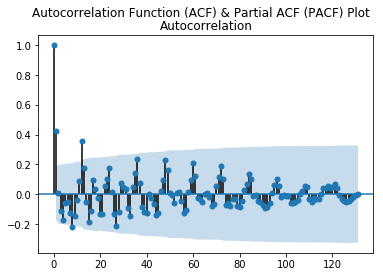

/home/nurul/.local/lib/python3.5/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


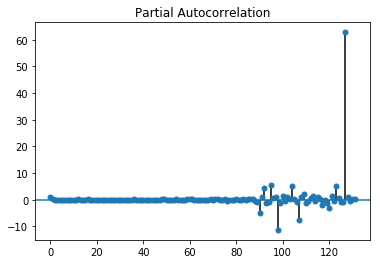

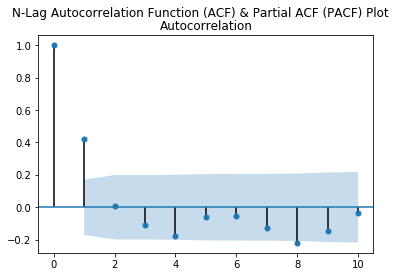

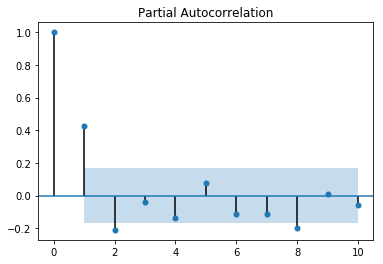

Maximum q should be:  2
Maximum p should be:  2


In [17]:
plot_autocorr(series_edit)
subplot_autocorr(series_edit, 10)
acf_check(series_edit, 10)
pacf_check(series_edit,10)

In [18]:
series_edit = pandas.Series(series_edit)
series_edit.to_csv('PredictTea-edit.csv')

/home/nurul/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [19]:
for n in range(1,6):
    split = len(series_ori) - n*(12)
    train, test = series_ori[0:split], series_ori[split:]
    print('Training Data %d: %d, Testing Data %d: %d' 
          % (n, len(train), n, len(test)))
    if (n==1):
        train1 = pandas.Series(train)
        test1 = pandas.Series(test)
        #train1.to_csv('PredictTea-train-1.csv')
        #test1.to_csv('PredictTea-test-1.csv')
    if (n==2):
        train2 = pandas.Series(train)
        test2 = pandas.Series(test)
        #train2.to_csv('PredictTea-train-2.csv')
        #test2.to_csv('PredictTea-test-2.csv')
    if (n==3):
        train3 = pandas.Series(train)
        test3 = pandas.Series(test)
        #train3.to_csv('PredictTea-train-3.csv')
        #test3.to_csv('PredictTea-test-3.csv')
    if (n==4):
        train4 = pandas.Series(train)
        test4 = pandas.Series(test)
        #train4.to_csv('PredictTea-train-4.csv')
        #test4.to_csv('PredictTea-test-4.csv')
    if (n==5):
        train5 = pandas.Series(train)
        test5 = pandas.Series(test)
        #train5.to_csv('PredictTea-train-5.csv')
        #test5.to_csv('PredictTea-test-5.csv')

Training Data 1: 120, Testing Data 1: 12
Training Data 2: 108, Testing Data 2: 24
Training Data 3: 96, Testing Data 3: 36
Training Data 4: 84, Testing Data 4: 48
Training Data 5: 72, Testing Data 5: 60


print(test1)

In [20]:
for n in range(1,6):
    split = len(series_edit) - n*(12)
    train_edit, test_edit = series_edit[0:split], series_edit[split:]
    print('Adjusted Training Data %d: %d, Adjusted Testing Data %d: %d' 
          % (n, len(train_edit), n, len(train_edit)))
    if (n==1):
        train1_edit = pandas.Series(train_edit)
        test1_edit = pandas.Series(test_edit)
        #train1_edit.to_csv('PredictTea-train-edit1.csv')
        #test1_edit.to_csv('PredictTea-test-edit1.csv')
    if (n==2):
        train2_edit = pandas.Series(train_edit)
        test2_edit = pandas.Series(test_edit)
        #train2_edit.to_csv('PredictTea-train-edit2.csv')
        #test2_edit.to_csv('PredictTea-test-edit2.csv')
    if (n==3):
        train3_edit = pandas.Series(train_edit)
        test3_edit = pandas.Series(test_edit)
        #train3_edit.to_csv('PredictTea-train-edit3.csv')
        #test3_edit.to_csv('PredictTea-test-edit3.csv')
    if (n==4):
        train4_edit = pandas.Series(train_edit)
        test4_edit = pandas.Series(test_edit)
        #train4_edit.to_csv('PredictTea-train-edit4.csv')
        #test4_edit.to_csv('PredictTea-test-edit4.csv')
    if (n==5):
        train5_edit = pandas.Series(train_edit)
        test5_edit = pandas.Series(test_edit)
        #train5_edit.to_csv('PredictTea-train-edit5.csv')
        #test5_edit.to_csv('PredictTea-test-edit5.csv')

Adjusted Training Data 1: 120, Adjusted Testing Data 1: 120
Adjusted Training Data 2: 108, Adjusted Testing Data 2: 108
Adjusted Training Data 3: 96, Adjusted Testing Data 3: 96
Adjusted Training Data 4: 84, Adjusted Testing Data 4: 84
Adjusted Training Data 5: 72, Adjusted Testing Data 5: 72


In [21]:
#PENGECEKAN FORMASI PARAMETER ARIMA TERBAIK UNTUK PEMODELAN DATA MODIF
import warnings
#from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from math import exp
from math import log
import numpy

# evaluate an ARIMA model
def evaluate_arima_model(train_dataset, test_dataset, arima_order):
	history = [x for x in train_dataset]
	predictions = list()
	#make predictions
	for t in range(len(test_dataset)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test_dataset[t])
	# calculate out of sample error
	error = mean_squared_error(test_dataset, predictions)
	return error

# Penentuan Formasi Terbaik Derajat Parameter
def evaluate_models(train_dataset, test_dataset, p_values, d_values, q_values):
	global best_cfg, best_score
	#train = train.astype('float32')
	#test = test.astype('float32')    
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = sqrt(evaluate_arima_model(train_dataset, test_dataset, order))
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order, rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [22]:
# evaluate parameters
p_values = range(0, maxp)
d_values = range(0, maxd)
q_values = range(0, maxq)
warnings.filterwarnings("ignore")

print('Split1 ARIMA Formation Test:')
evaluate_models(train1_edit.values, test1_edit.values, p_values, d_values, q_values)
split1_cfg=best_cfg
split1_rmse=best_score
print()
print('Split2 ARIMA Formation Test:')
evaluate_models(train2_edit.values, test2_edit.values, p_values, d_values, q_values)
split2_cfg=best_cfg
split2_rmse=best_score
print()
print('Split3 ARIMA Formation Test:')
evaluate_models(train3_edit.values, test3_edit.values, p_values, d_values, q_values)
split3_cfg=best_cfg
split3_rmse=best_score
print()
print('Split4 ARIMA Formation Test:')
evaluate_models(train4_edit.values, test4_edit.values, p_values, d_values, q_values)
split4_cfg=best_cfg
split4_rmse=best_score
print()
print('Split5 ARIMA Formation Test:')
evaluate_models(train5_edit.values, test5_edit.values, p_values, d_values, q_values)
split5_cfg=best_cfg
split5_rmse=best_score

Split1 ARIMA Formation Test:
ARIMA(0, 0, 0) RMSE=0.259
ARIMA(0, 0, 1) RMSE=0.196
ARIMA(0, 1, 0) RMSE=0.160
ARIMA(0, 1, 1) RMSE=0.235
ARIMA(1, 0, 0) RMSE=0.186
ARIMA(1, 0, 1) RMSE=0.196
ARIMA(1, 1, 0) RMSE=0.156
ARIMA(1, 1, 1) RMSE=0.174
Best ARIMA(1, 1, 0) RMSE=0.156

Split2 ARIMA Formation Test:
ARIMA(0, 0, 0) RMSE=0.226
ARIMA(0, 0, 1) RMSE=0.185
ARIMA(0, 1, 0) RMSE=0.177
ARIMA(0, 1, 1) RMSE=0.217
ARIMA(1, 0, 0) RMSE=0.176
ARIMA(1, 0, 1) RMSE=0.186
ARIMA(1, 1, 0) RMSE=0.172
ARIMA(1, 1, 1) RMSE=0.172
Best ARIMA(1, 1, 1) RMSE=0.172

Split3 ARIMA Formation Test:
ARIMA(0, 0, 0) RMSE=0.214
ARIMA(0, 0, 1) RMSE=0.185
ARIMA(0, 1, 0) RMSE=0.183
ARIMA(0, 1, 1) RMSE=0.218
ARIMA(1, 0, 0) RMSE=0.174
ARIMA(1, 0, 1) RMSE=0.188
ARIMA(1, 1, 0) RMSE=0.178
ARIMA(1, 1, 1) RMSE=0.175
Best ARIMA(1, 0, 0) RMSE=0.174

Split4 ARIMA Formation Test:
ARIMA(0, 0, 0) RMSE=0.221
ARIMA(0, 0, 1) RMSE=0.202
ARIMA(0, 1, 0) RMSE=0.212
ARIMA(0, 1, 1) RMSE=0.221
ARIMA(1, 0, 0) RMSE=0.189
ARIMA(1, 0, 1) RMSE=0.206
ARIMA(1,

In [23]:
if (int(split4_rmse) <= int(split5_rmse)):
    print('Best Using Split4')
    best_cfg = split4_cfg
    test_edit = test4_edit
    train_edit = train4_edit
    test = test4
    train = train4
elif (int(split3_rmse) <= int(split4_rmse)):
    print('Best Using Split3')
    best_cfg = split3_cfg
    test_edit = test3_edit
    train_edit = train3_edit
    test = test3
    train = train3
elif (int(split2_rmse) <= int(split3_rmse)):
    print('Best Using Split2')
    best_cfg = split2_cfg
    test_edit = test2_edit
    train_edit = train2_edit
    test = test2
    train = train2
elif (int(split1_rmse) <= int(split2_rmse)):
    print('Best Using Split1')
    best_cfg = split1_cfg
    test_edit = test1_edit
    train_edit = train1_edit
    test = test1
    train = train1
else:
    print('Best Using Split5')
    best_cfg = split5_cfg
    test_edit = test5_edit
    train_edit = train5_edit
    test = test5
    train = train5

Best Using Split4


if (int(split1_rmse) <= int(split2_rmse)):
    print('Best Using Split1')
    best_cfg = split1_cfg
    test_edit = test1_edit
    train_edit = train1_edit
    test = test1
    train = train1
elif (int(split2_rmse) <= int(split3_rmse)):
    print('Best Using Split2')
    best_cfg = split2_cfg
    test_edit = test2_edit
    train_edit = train2_edit
    test = test2
    train = train2
elif (int(split3_rmse) <= int(split4_rmse)):
    print('Best Using Split3')
    best_cfg = split3_cfg
    test_edit = test3_edit
    train_edit = train3_edit
    test = test3
    train = train3
elif (int(split4_rmse) <= int(split5_rmse)):
    print('Best Using Split4')
    best_cfg = split4_cfg
    test_edit = test4_edit
    train_edit = train4_edit
    test = test4
    train = train5
else:
    print('Best Using Split5')
    best_cfg = split5_cfg
    test_edit = test5_edit
    train_edit = train5_edit
    test = test5
    train = train5

predicted = 10.577860, expected = 10.689585
predicted = 10.622086, expected = 10.166543
predicted = 10.411230, expected = 10.734735
predicted = 10.636014, expected = 10.763119
predicted = 10.648582, expected = 10.751269
predicted = 10.645460, expected = 10.674613
predicted = 10.616337, expected = 10.211214
predicted = 10.434648, expected = 10.131388
predicted = 10.396882, expected = 10.416499
predicted = 10.508669, expected = 10.343629
predicted = 10.478024, expected = 10.488305
predicted = 10.534915, expected = 10.540781
predicted = 10.555560, expected = 10.678516
predicted = 10.610817, expected = 10.424012
predicted = 10.509388, expected = 10.873881
predicted = 10.687401, expected = 10.855557
predicted = 10.683143, expected = 10.956543
predicted = 10.727566, expected = 10.656480
predicted = 10.607758, expected = 10.497610
predicted = 10.544098, expected = 10.459585
predicted = 10.528259, expected = 10.419595
predicted = 10.511313, expected = 10.613248
predicted = 10.588766, expected 

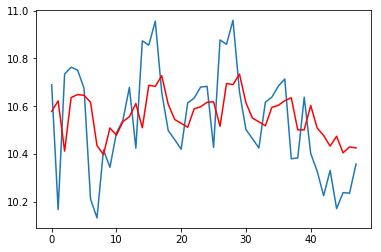

In [24]:
## from pandas import read_csv
#from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from math import exp
from math import log
import numpy
import pandas

train_edit = train_edit.values
test_edit = test_edit.values

history = [x for x in train_edit]
predicted = list()

for t in range(len(test_edit)):
	model = ARIMA(history, order=(best_cfg[0],best_cfg[1],best_cfg[2]))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predicted.append(yhat)
	obs = test_edit[t]
	history.append(obs)
	print('predicted = %f, expected = %f' % (yhat, obs))
error = mean_squared_error(test_edit, predicted)
rmse = sqrt(error)
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test_edit)
pyplot.plot(predicted, color='red')
pyplot.show()

In [25]:
# Pembuatan Inversi Tranformasi
def invert_trans(dataset):
    dataset = numpy.asarray(dataset)
    invert_trans = numpy.square(dataset)
    dataset = invert_trans
    return dataset

# Pembuatan Inversi Differencing
def invert_differ(dataset):
    for yhat in predictions:
        dataset = yhat + history[-12]
    return dataset

In [26]:
predictions = [list(p) for p in predicted]
#X = list(chain(*predicted))
if (trans >  0):
    while (trans > 0):
        print ('Invert Transformation -', trans)
        predictions = invert_trans(predictions)
        print(predictions[-3:])
        var_split(predictions)
        var_check(predictions)
        trans=trans-1    
if (differ > 0):
    while (differ > 0):
        print ('Invert Differencing -', trans)
        predictions = invert_differ(predictions)
        print(predictions[-3:])
        mean_split(predictions)
        mean_check(predictions)
        differ=differ-1 

Invert Transformation - 2
[[108.24991914]
 [108.76238777]
 [108.68000777]]
Variance Comparison: 0 = 0
Data has Variance Stationarity

Invert Transformation - 1
[[11718.04499384]
 [11829.25699411]
 [11811.34408987]]
Variance Comparison: 0 = 0
Data has Variance Stationarity



predicted = 13057, expected = 12519
predicted = 10683, expected = 12730
predicted = 13279, expected = 11749
predicted = 13420, expected = 12797
predicted = 13361, expected = 12857
predicted = 12984, expected = 12842
predicted = 10872, expected = 12702
predicted = 10536, expected = 11855
predicted = 11773, expected = 11684
predicted = 11447, expected = 12195
predicted = 12101, expected = 12053
predicted = 12345, expected = 12317
predicted = 13003, expected = 12414
predicted = 11807, expected = 12676
predicted = 13981, expected = 12198
predicted = 13887, expected = 13046
predicted = 14411, expected = 13025
predicted = 12896, expected = 13243
predicted = 12144, expected = 12661
predicted = 11969, expected = 12360
predicted = 11787, expected = 12286
predicted = 12688, expected = 12207
predicted = 12785, expected = 12571
predicted = 13011, expected = 12611
predicted = 13024, expected = 12702
predicted = 11822, expected = 12711
predicted = 14000, expected = 12227
predicted = 13905, expected 

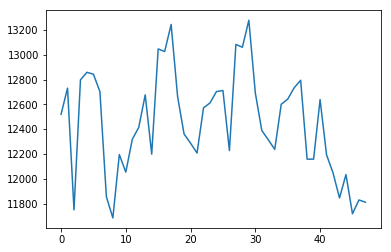

In [27]:
from itertools import chain
predictions = list(map(float, predictions))
#predictions = pandas.Series(predictions)
#predictions = round(predictions)

for t in range(len(predictions)):
	yhat = test[t]
	obs = predictions[t]
	print('predicted = %d, expected = %d' % (yhat, obs))

#print(predictions)
pyplot.plot(predictions)
pyplot.show()

#stat_split(predictions)

#mean_split(predictions)
#mean_print(predictions)
#mean_check(predictions)

#var_split(predictions)
#var_print(predictions)
#var_check(predictions)


#!! https://machinelearningmastery.com/time-series-forecast-study-python-monthly-sales-french-champagne/ 

https://machinelearningmastery.com/feature-selection-time-series-forecasting-python/

In [28]:
#for i in range(0, len(X)):
#    X[i] = int(X[i])
#predictions = list(map(int, predictions)) 
#predictions = pandas.Series(predictions)
#predictions = round(predictions)
#print(predictions)


#var_check(X)
#mean_check(X)

In [29]:
# fit model
model = ARIMA(train_edit, order=(best_cfg[0],best_cfg[1],best_cfg[2]))
model_fit = model.fit(disp=0)
# multi-step out-of-sample forecast
start_index = len(train_edit)
end_index = start_index + 11
forecast = model_fit.predict(start=start_index, end=end_index)
#print(n_trans)
#print(n_differ)
# invert the differenced forecast to something usable
if (n_trans >  0):
    while (n_trans > 0):
        #print ('Invert Transformation -', trans)
        forecast = invert_trans(forecast)
        #var_split(forecast)
        #var_check(forecast)
        n_trans=n_trans-1 
        #print(forecast)
if (n_differ > 0):
    while (n_differ > 0):
        #print ('Invert Differencing -', trans)
        forecast = invert_differ(forecast)
        print
        #mean_split(forecast)
        #mean_check(forecast)
        n_differ=n_differ-1 
        #print(forecast)


forecast = pandas.Series(forecast)
print('Inverted Data')
print(forecast)
#forecasts = forecast.reindex(date_index)
#print(forecast)
#history = [x for x in train_edit]
#for day in range(1,13):
#	print('01-%02d-2018 : %f' % (day, forecast))

Inverted Data
0     12519.622584
1     12513.134198
2     12510.562574
3     12509.543163
4     12509.139034
5     12508.978820
6     12508.915303
7     12508.890122
8     12508.880139
9     12508.876181
10    12508.874612
11    12508.873990
dtype: float64


In [30]:
all_start_index = len(series_ori)
all_end_index = all_start_index + 11
forecast_index = range(all_start_index, all_end_index+1)
date_index = pandas.date_range(start='2017-01-01', periods=len(forecast), freq='MS')
forecast = pandas.Series(map(int,forecast), index = forecast_index)
#print(forecast)

print(pandas.Series(forecast))

pyplot.plot(forecast)
pyplot.show()

In [31]:
series_ori = pandas.Series(series_ori)
all_prediction = series_ori.append(forecast)
print(all_prediction.tail(60))
#result = pandas.concat(series_ori, forecast)

84     13057
85     10683
86     13279
87     13420
88     13361
89     12984
90     10872
91     10536
92     11773
93     11447
94     12101
95     12345
96     13003
97     11807
98     13981
99     13887
100    14411
101    12896
102    12144
103    11969
104    11787
105    12688
106    12785
107    13011
108    13024
109    11822
110    14000
111    13905
112    14430
113    12916
114    12164
115    11988
116    11810
117    12704
118    12805
119    13030
120    13175
121    11606
122    11621
123    12804
124    11706
125    11374
126    10929
127    11391
128    10699
129    10984
130    10974
131    11508
132    12519
133    12513
134    12510
135    12509
136    12509
137    12508
138    12508
139    12508
140    12508
141    12508
142    12508
143    12508
dtype: int64


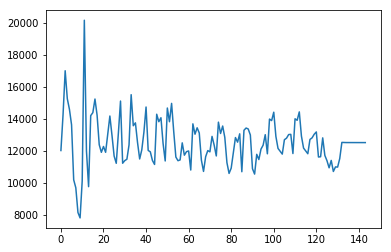

In [32]:
pyplot.plot(all_prediction)
pyplot.show()